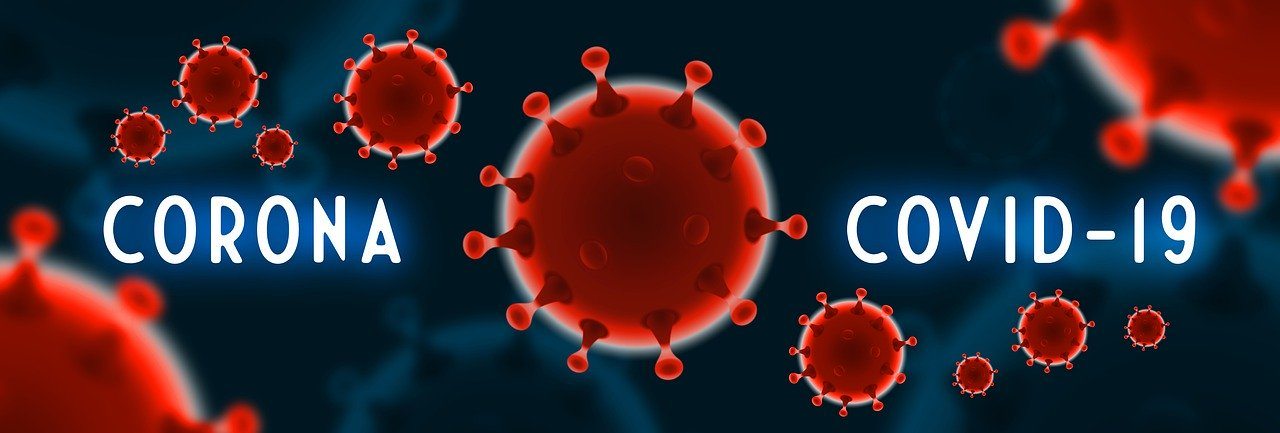

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/AI_project/Book1.xlsx")
data.head(5)

,Province,Confirmed,Recovered,Deaths
0,DKI Jakarta,3032,234,287
1,Jawa Barat,696,45,59
2,Jawa Timur,590,98,54
3,Sulawesi Selatan,370,43,25
4,Jawa Tengah,349,51,44


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   34 non-null     object
 1   Confirmed  34 non-null     int64 
 2   Recovered  34 non-null     int64 
 3   Deaths     34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [ ]:
#summary statistics 
data.describe()

,Confirmed,Recovered,Deaths
count,34.000000,34.000000,34.000000
mean,192.617647,20.176471,17.117647
std,528.469546,42.856682,50.128782
min,1.000000,0.000000,0.000000
25%,10.250000,2.000000,1.000000
50%,52.500000,6.000000,3.000000
75%,94.250000,12.750000,7.000000
max,3032.000000,234.000000,287.000000


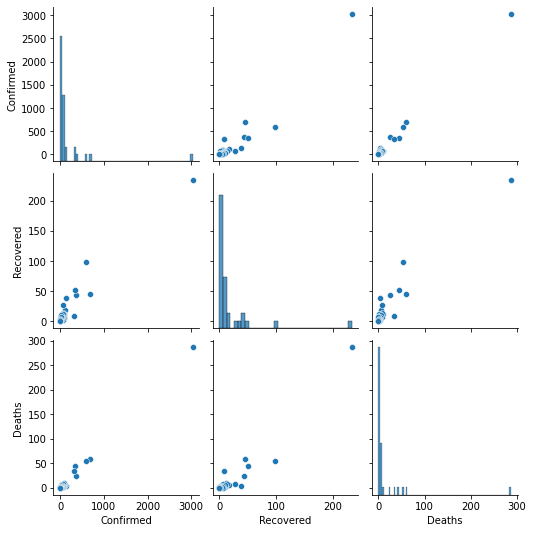

In [ ]:
sns.pairplot(data)

<Figure size 1440x1080 with 0 Axes>

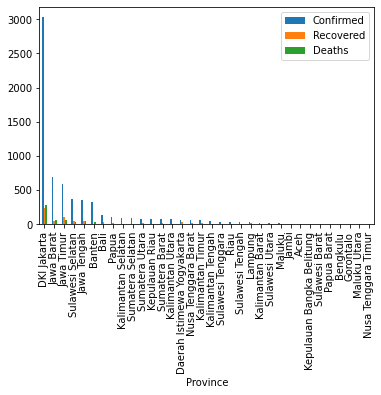

In [ ]:
x = (data['Province'])
y = ['Confirmed','Recovered','Deaths']
plt.figure(figsize=(20,15))
data.plot(x='Province', y= y,kind='bar')
plt.show()

### K-Means Elbow **method**

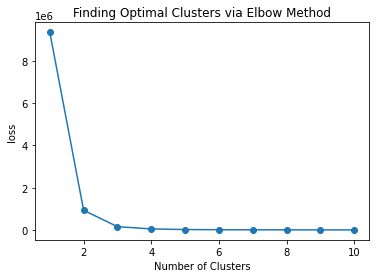

In [ ]:
loss =[]
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(data[['Confirmed','Recovered','Deaths']])
    loss.append(km.inertia_)
    
#printing loss against number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss,'o-')
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

## Kmeans with  Silhouette


In [ ]:
from sklearn.metrics import silhouette_score
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(data[['Confirmed','Recovered','Deaths']]) for k in range (1,10)]
silhouette_scores= [silhouette_score((data[['Confirmed','Recovered','Deaths']]),model.labels_) for model in kmeans_per_k[1:]]

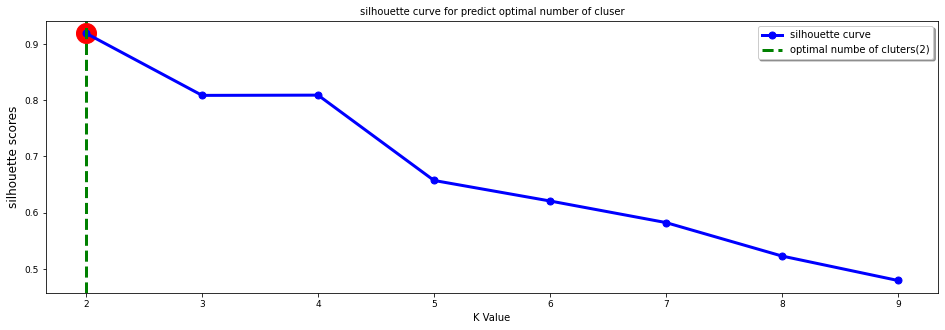

In [ ]:
plt.figure(figsize=(16,5))    

plt.plot(range(2,10),silhouette_scores,marker='o',linewidth=3, color="blue", markersize=7,label='silhouette curve')
plt.title("silhouette curve for predict optimal number of cluser",fontsize=10,color="black")
plt.xlabel("K Value",fontsize=10,color="black")
plt.xticks(fontsize=9,color="black")
plt.yticks(fontsize=9,color="black")
plt.ylabel("silhouette scores",family="Arial",fontsize=12,color="black")
k = np.argmax(silhouette_scores) + 2
k
#calculate te optimal number of cluster 


#draw a vertcal line to mark opyimal number of clusters
plt.axvline(x=k ,linestyle='--',c='green',linewidth=3,label='optimal numbe of cluters({})'.format(k))
plt.scatter(k,silhouette_scores[k-2],c='red',s=400)
plt.legend(shadow=True)
plt.show()

## **Find Optimal K with Gap Statistic**

Text(0.5, 1.0, 'Gap Statistic vs. K')

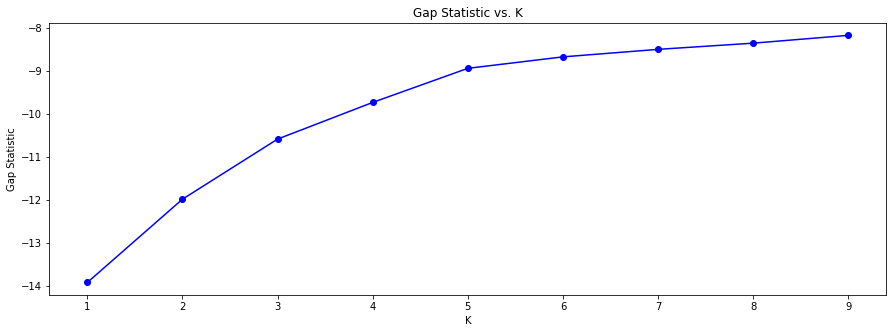

In [ ]:
def optimalK(data, nrefs=3, maxClusters=5):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(data[['Confirmed','Recovered','Deaths']], maxClusters=10)
fig = plt.figure(figsize=(15,5))
plt.plot(df['clusterCount'], df['gap'], linestyle='-', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')


#  **Implement Kmeans on the data**

In [ ]:
km_model = KMeans(n_clusters=3)
km_model.fit(data[['Confirmed','Recovered','Deaths']])

KMeans(n_clusters=3)

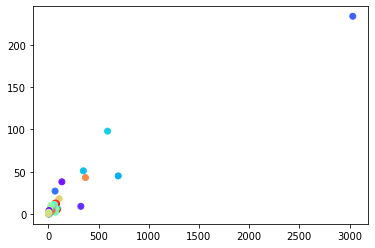

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(data['Province'])

#pring the data points with original labels
plt.scatter((data[['Confirmed','Recovered','Deaths']]).iloc[:,0], (data[['Confirmed','Recovered','Deaths']]).iloc[:,1], c= labels,cmap='rainbow' )


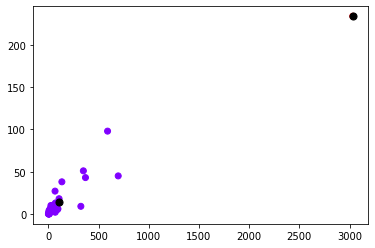

In [ ]:
# training KMeans with 2 clusters
km_model = KMeans(n_clusters=2)
km_model.fit(data[['Confirmed','Recovered','Deaths']])
#pring the data points with prediced labels
plt.scatter((data[['Confirmed','Recovered','Deaths']]).iloc[:,0], (data[['Confirmed','Recovered','Deaths']]).iloc[:,1], c=km_model.labels_, cmap='rainbow' )
#print the predicted centroids
plt.scatter(km_model.cluster_centers_[:, 0],km_model.cluster_centers_[:, 1], s=50,c='black')

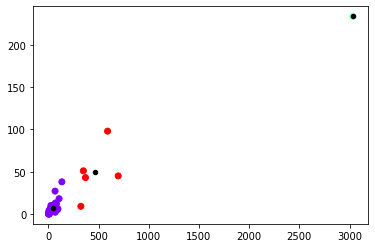

In [ ]:
km_model = KMeans(n_clusters=3)
km_model.fit(data[['Confirmed','Recovered','Deaths']])

plt.scatter((data[['Confirmed','Recovered','Deaths']]).iloc[:,0], (data[['Confirmed','Recovered','Deaths']]).iloc[:,1], c=km_model.labels_, cmap='rainbow' )
#print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:, 1],s=20, c='black')

In [ ]:
data['Result'] = pd.Series(km_model.labels_)
data

,Province,Confirmed,Recovered,Deaths,Result
0,DKI Jakarta,3032,234,287,1
1,Jawa Barat,696,45,59,2
2,Jawa Timur,590,98,54,2
3,Sulawesi Selatan,370,43,25,2
4,Jawa Tengah,349,51,44,2
5,Banten,324,9,34,2
6,Bali,135,38,3,0
7,Papua,107,18,6,0
8,Kalimantan Selatan,96,6,6,0
9,Sumatera Selatan,89,5,3,0
